<a href="https://colab.research.google.com/github/Gcango/Mercado_Vendas_Games_Analise/blob/main/Venda_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste Projecto conhecido, com dataset do kaggle, procurou-se analisar o estado da venda dos jogos de game plastations. Diferentes perguntas são respondidas em formas de textos bem como de forma gráfica.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
dados = pd.read_csv("/content/PS4_GamesSales.csv", encoding='latin-1')

In [17]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [65]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [18]:
#Conhecendo os dados

In [19]:
print(f" O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas")

 O dataset possui 1034 linhas e 9 colunas


In [20]:
dados.dtypes

Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [22]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [23]:
#Verificando e retirando os valores Nulos caso existe b

In [24]:
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

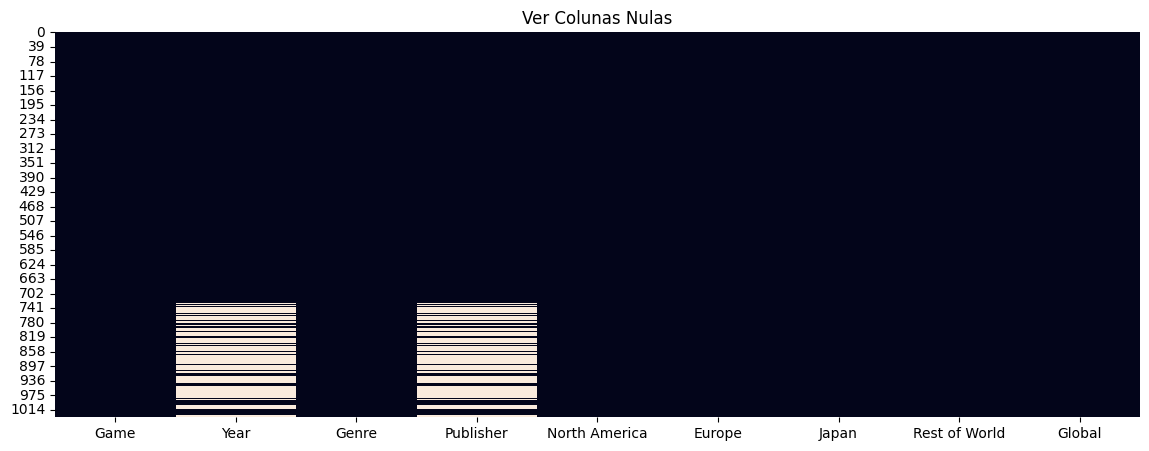

In [25]:
plt.figure(figsize=(14, 5))
plt.title('Ver Colunas Nulas')
sns.heatmap(dados.isnull(), cbar=False );

In [26]:
dados.dropna(inplace=True)

In [27]:
#Veficando como estão as compras por ano

In [44]:
Qtd_vendas_globais = dados.groupby('Year')['Global'].sum().reset_index()
Qtd_vendas_globais

,Year,Global
0,2013.0,28.76
1,2014.0,115.85
2,2015.0,133.99
3,2016.0,135.72
4,2017.0,130.90
5,2018.0,50.20


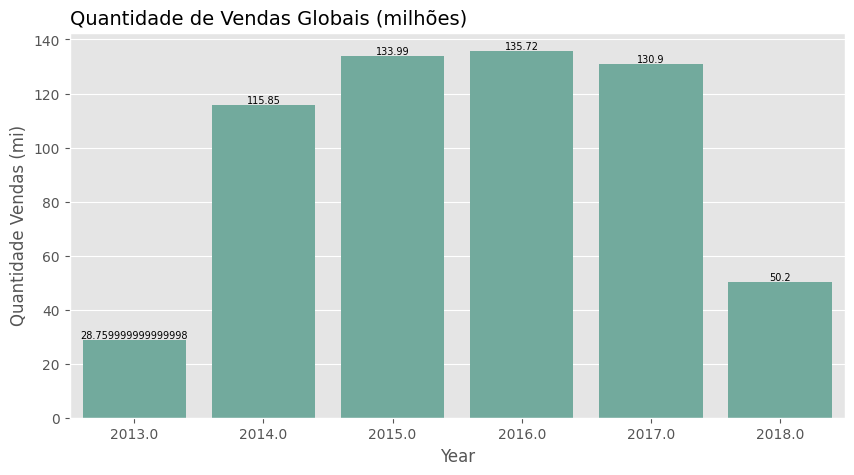

In [46]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )
plt.title('Quantidade de Vendas Globais (milhões)', loc='left', fontsize=14 )
plot = sns.barplot( data=Qtd_vendas_globais, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum )
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.ylabel('Quantidade Vendas (mi)');

In [ ]:
#Agrupando só os dados que tiveram Vendas.

In [30]:
dados = dados.loc[(dados['Year']!= 2019) & (dados['Year'] != 2020)]

In [31]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [32]:
#Qual é a distribuição dos bens

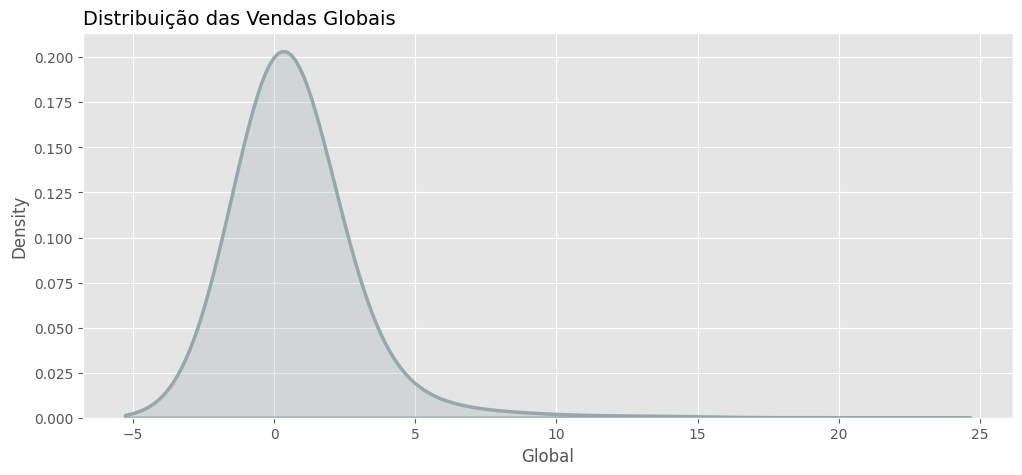

In [33]:
plt.figure( figsize=(12, 5) )
plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14 )
sns.kdeplot( dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

In [ ]:
#Como estão distribuidas as vendas por Paises e outros?

In [48]:
vendas_pais = dados.groupby(by = ['Year']).sum()
vendas_pais

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


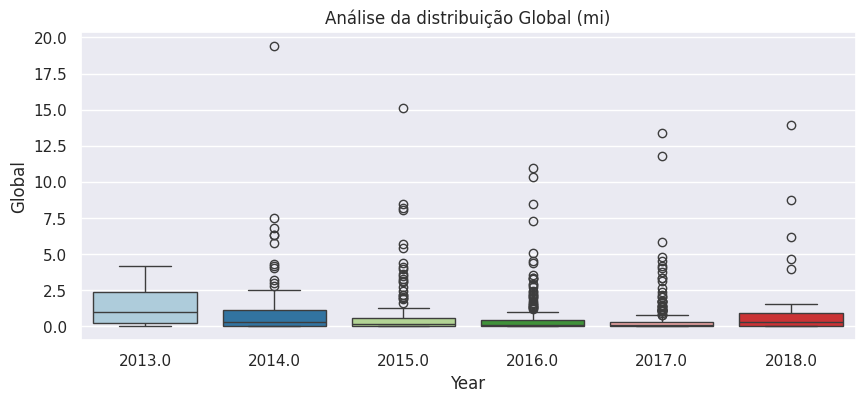

In [54]:

plt.figure( figsize=(10, 4) )
plt.title('Análise da distribuição Global (mi)')
sns.boxplot( data=dados, x='Year', y='Global', palette="Paired");

In [ ]:
#Mostrar uma tabela cujo os dados de Venda são superior a 10 milhões

In [55]:
dados.loc[dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
# Faça uma analise tendo em conta a proporção dos 100% de cada continemente comparado ao Total

In [56]:
verificar = dados.groupby(by=['Year']).sum().reset_index()
verificar

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [57]:
America = [ America / Total * 100 for America, Total in zip(verificar['North America'], verificar['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( verificar['Europe'], verificar['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( verificar['Japan'], verificar['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( verificar['Rest of World'], verificar['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [ ]:
#Mostre essa verificação num gráfico empilhado

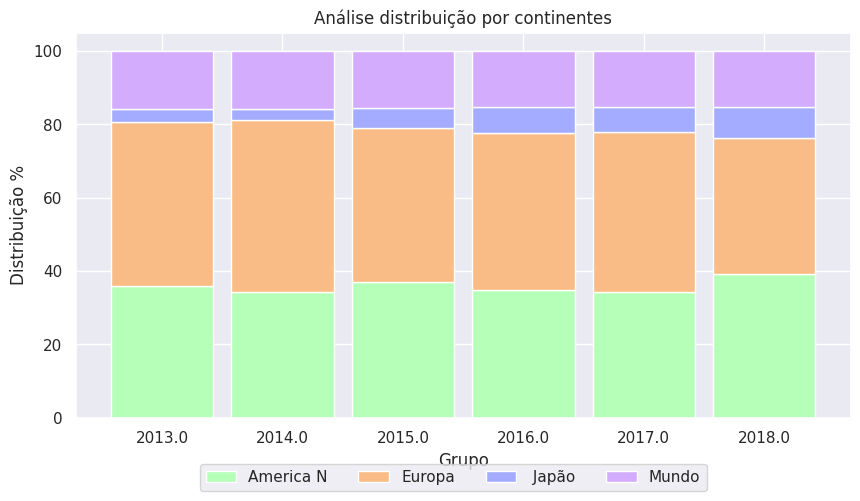

In [59]:
plt.figure( figsize=(10, 5) )
Largura_Barra = 0.85
Rotulos = verificar['Year']
Grupos = [0, 1, 2, 3, 4, 5]
plt.title('Análise distribuição por continentes')
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [ ]:
#Mostrar os produtores dos Jogos

In [61]:
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
#Mostrando a Quatidade de Venda por paises em relação ao produtor genero e total de Jogos

In [64]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

dados['Produtor'] = Funcao_Label.fit_transform( dados['Publisher'] )
dados['Genero'] = Funcao_Label.fit_transform( dados['Genre'] )
dados['Jogo'] = Funcao_Label.fit_transform( dados['Game'] )

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


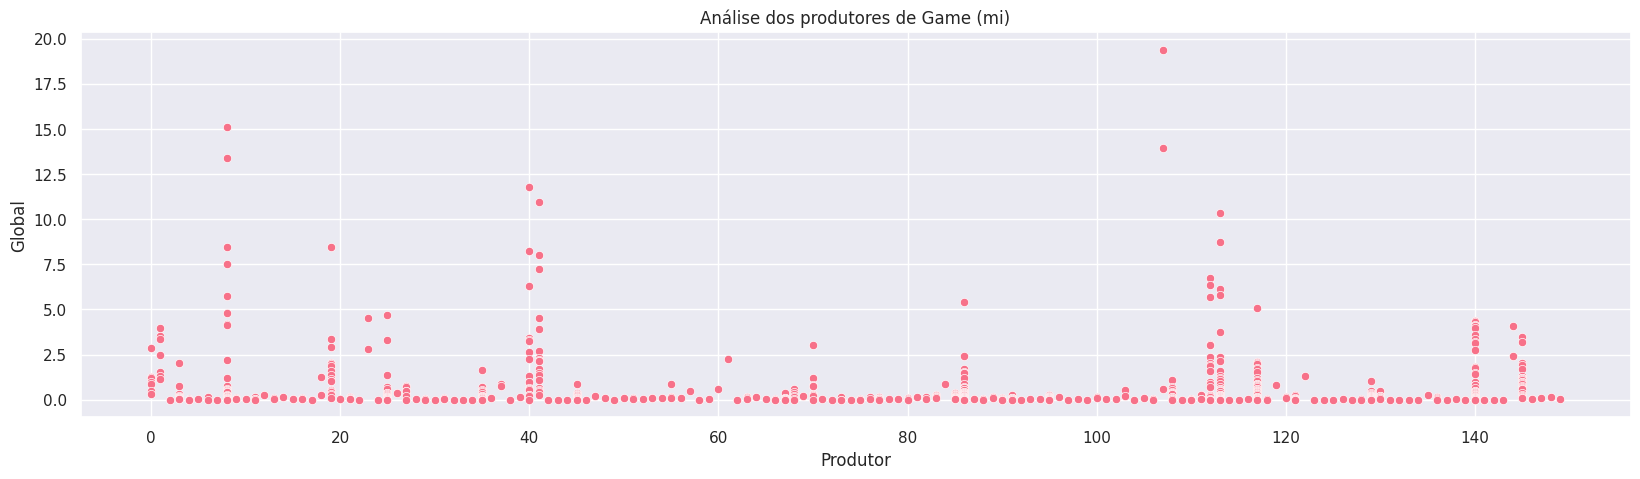

In [66]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (milhões)')
sns.scatterplot(data=dados, x='Produtor', y='Global', color=Paleta_Cores[0]);

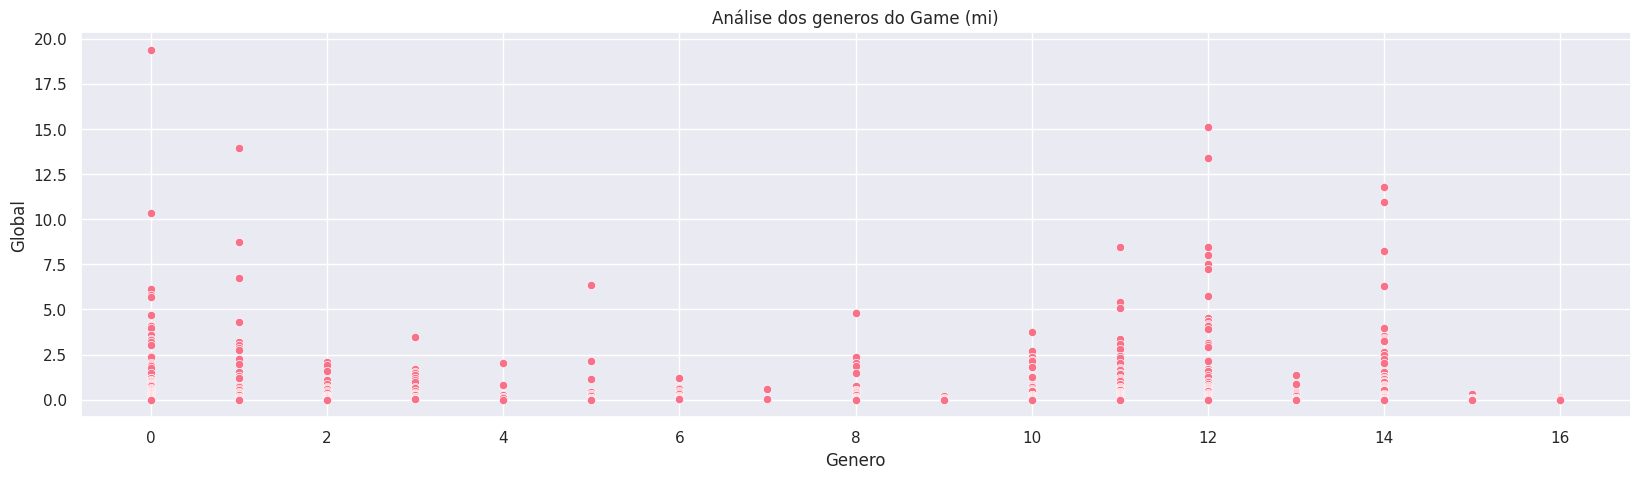

In [67]:
plt.figure( figsize=(20,5))
plt.title('Análise dos generos do Game (milhões)')
sns.scatterplot(data=dados, x='Genero', y='Global', color=Paleta_Cores[0] );

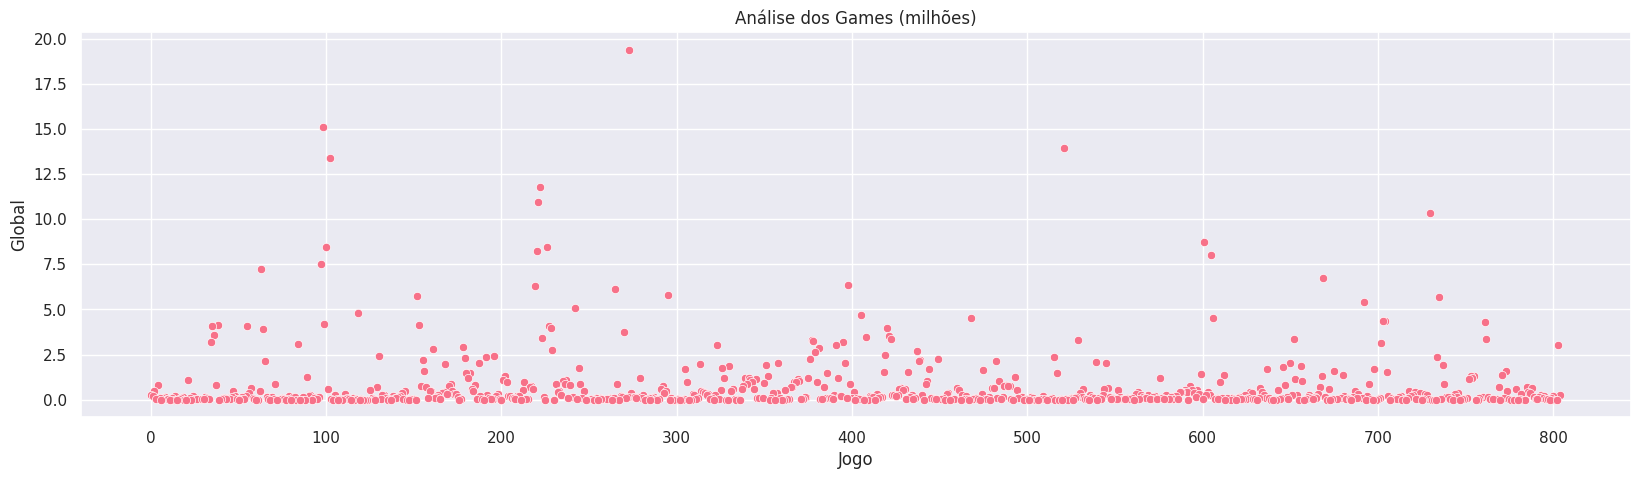

In [68]:
plt.figure( figsize=(20,5))
plt.title('Análise dos Games (milhões)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=Paleta_Cores[0] );